# CHURN VERİ ANALİZİ

## Verinin Hikayesi

## Müşteri kaybı (churn) tahminlemesi bankalar için büyük önem arz etmektedir.Bu çalışmadaki amaç churn etme olasılığı bulunan müşterileri tahmin etmektir.Tahmin sonrası pazarlama veya kampanya planlamaları konusunda istediğiniz stratejileri geliştirebilirsiniz.

- **Rownumber**:1'den 10000'e kadar numaralar.
- **Customer ID**: Müşteri numarası.
- **Surname**: Müşterinin soyadı.
- **Credit Score**: Müşterinin kredi skorunu yansıtır.
- **Geography**: Müşterinin ülkesi.
- **Gender**: Müşterinin cinsiyeti.
- **Age**: Müşterinin yaşı.
- **Tenure**: Müşterinin bankadaki müşteri olma süresi.
- **Balance**: Hesapta bulunan tutar.
- **NumOfProducts**: Müşterinin sahip olduğu ürün sayısı
- **HasCrCard**: Müşterinin kredi kartı olup olmadığı bilgisi.
- **IsActiveMember**: Müşterinin aktiflik durumu.
- **EstimatedSalary**: Müşterinin geliri.
- **Exited (churn)**: Müşterinin ayrılıp ayrılmadığı


# Kütüphaneler

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

## Veri Setinin Yüklenmesi ve Kopyalanması

In [19]:
churn = pd.read_csv("/content/Churn_Modelling.csv") #veri seti yüklendi

df = churn.copy()     #veri seti bir değişkene kopyalandı



## Verinin İncelenmesi

### Veriye İlk Bakış

In [20]:
#veri setinin ilk 5 gözlemi ön tanımlı olarak incelendi
df.head()       

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
#veri setinin son 5 gözlemi ön tanımlı olarak  incelendi
df.tail()      

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [22]:
#veri setindeki veri tipleri ile ilgili bilgilere ulaşıldı(2 ondalıklı sayı,9 tam sayı,3 obje)
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [23]:
#tip dönüşümleri yapıldı
df.Geography = pd.Categorical(df.Geography) 
df.Gender = pd.Categorical(df.Gender)
df.Surname = pd.Categorical(df.Surname)


In [24]:
#yeni tipler incelendi
df.dtypes

RowNumber             int64
CustomerId            int64
Surname            category
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

### Veri Setinin Betimlenmesi

In [25]:
#veri setinin gözlem ve değişken sayısı görüldü
df.shape      

(10000, 14)

In [26]:
#veri setinin değişkenleri incelendi
df.columns    

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Eksik Verilerin İncelenmesi

In [27]:
#veri setinde eksik/kayıp gözlem olmadığı saptandı
df.isnull().values.any()  

False

### Kategorik Değişkenlerin İncelenmesi

In [28]:
#verideki kategorik değişkenler df_kat değişkenine eşitlendi
df_kat = df.select_dtypes(include = ["category"])
df_kat.head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [29]:
#Coğrafya değişkeninin sınıf frekansları incelendi
df_kat["Geography"].value_counts() 

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [30]:
#cinsiyet sınıf frekansları incelendi
df_kat["Gender"].value_counts() 

Male      5457
Female    4543
Name: Gender, dtype: int64

### Nümerik Değişkenlerin İncelenmesi





In [31]:
#sadece nümerik tipteki değişkenler seçildi
df_num = df.select_dtypes(include =["int64","float64"])
df_num.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [32]:
#nümerik değişkenler betimleyici istatistiksel yöntemler ile incelendi
df_num.describe().T 

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Veri Görselleştirme

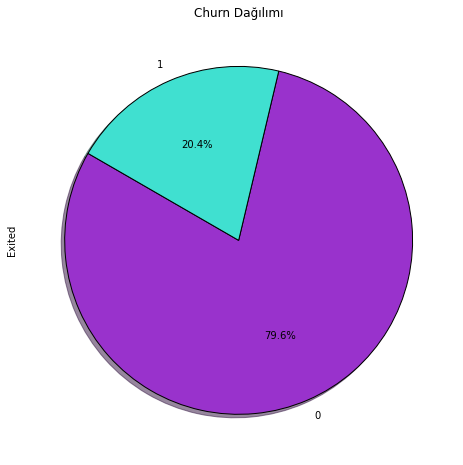

In [33]:
df["Exited"].value_counts().plot(kind="pie", 
                                 autopct='%1.1f%%', 
                                 figsize=(8, 8), 
                                 wedgeprops={'edgecolor': 'black'}, 
                                 shadow=True, 
                                 colors = ['darkorchid', 'turquoise'], 
                                 startangle=150)
plt.title('Churn Dağılımı');

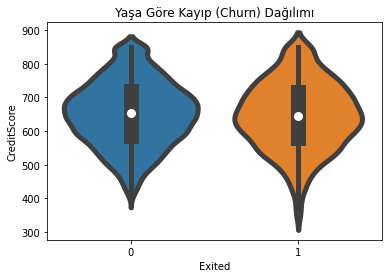

In [34]:
sns.violinplot( x=df["Exited"], y=df["CreditScore"], linewidth=5)
plt.title("Yaşa Göre Kayıp (Churn) Dağılımı")
plt.show()

Text(0.5, 1.0, 'Müşterilik Yılıve Cinsiyete Göre Kayıp (Churn) Dağılımı')

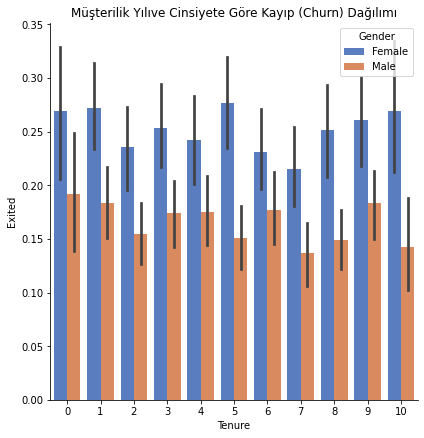

In [35]:
sns.factorplot("Tenure", "Exited", "Gender",data=df, kind="bar",size=6, palette="muted",legend_out=False)
plt.title("Müşterilik Yılıve Cinsiyete Göre Kayıp (Churn) Dağılımı")



Text(0.5, 1.0, 'Müşteri Yaşına Göre Kayıp (Churn) Dağılımı')

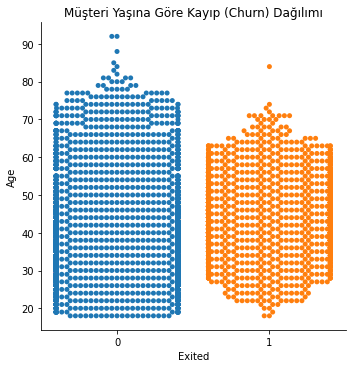

In [36]:
sns.catplot(x="Exited", y="Age", data=df,kind="swarm");
plt.title("Müşteri Yaşına Göre Kayıp (Churn) Dağılımı")



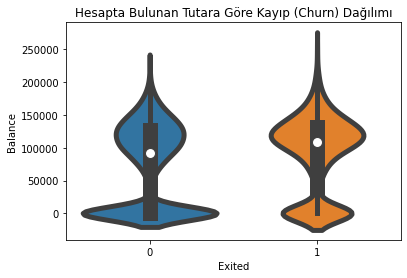

In [37]:
sns.violinplot( x=df["Exited"], y=df["Balance"], linewidth=5)
plt.title("Hesapta Bulunan Tutara Göre Kayıp (Churn) Dağılımı")
plt.show()

Text(0.5, 1.0, 'Ülkelere Göre Kayıp (Churn) Dağılımı')

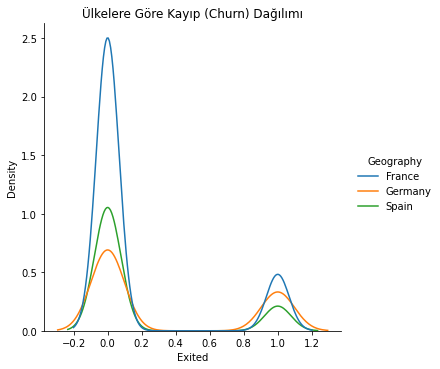

In [38]:
sns.displot(data=df, x="Exited",hue='Geography',kind ='kde')
plt.title("Ülkelere Göre Kayıp (Churn) Dağılımı") 


Text(0.5, 1.0, 'Ürün Sayısına Göre Kayıp (Churn) Dağılımı')

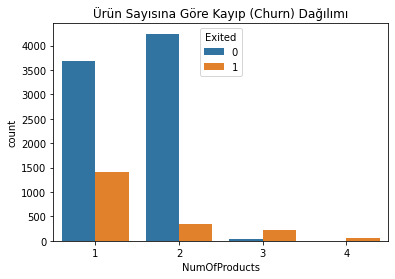

In [39]:
sns.countplot(data=df, x="NumOfProducts",hue='Exited')
plt.title("Ürün Sayısına Göre Kayıp (Churn) Dağılımı") 


Text(0.5, 1.0, 'Üye Aktifliğine Göre Kayıp (Churn) Dağılımı')

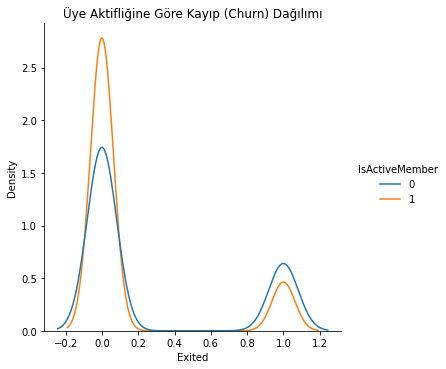

In [40]:
sns.displot(data=df, x="Exited",hue='IsActiveMember',kind ='kde');
plt.title("Üye Aktifliğine Göre Kayıp (Churn) Dağılımı")

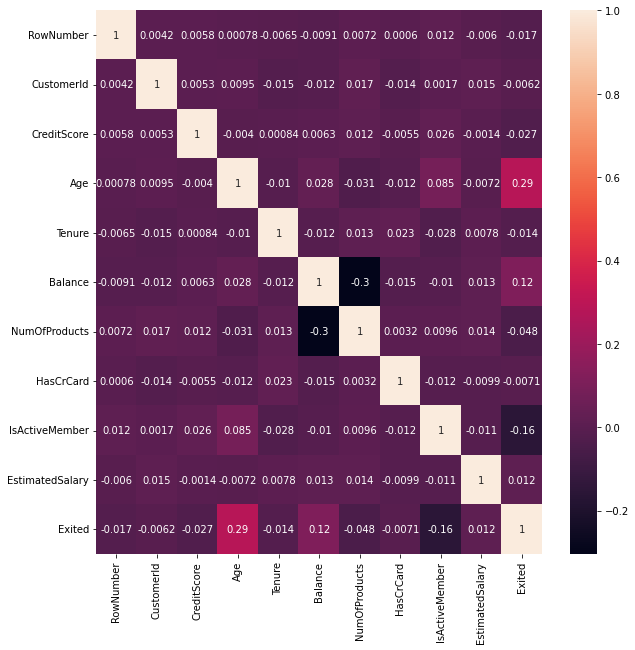

In [41]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True)

## Veri Ön İşleme

### Aykırı Gözlem Analizi

In [42]:
#modellemeye girmeyecek değişkenler veri setinden çıkarıldı
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace= True)

In [43]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [44]:
df_CreditScore =df["CreditScore"]
df_CreditScore.head(3)

0    619
1    608
2    502
Name: CreditScore, dtype: int64

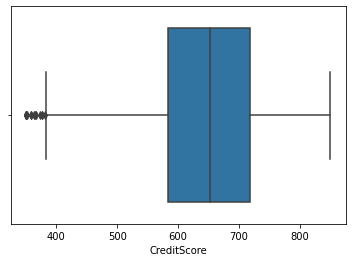

In [45]:
sns.boxplot(x = df_CreditScore)


In [46]:
Q1 = df_CreditScore.quantile(0.25)
Q3 = df_CreditScore.quantile(0.75)
IQR = Q3-Q1

In [47]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [48]:
aykrdf =(df_CreditScore < alt_sinir)|(df_CreditScore > ust_sinir)
aykrdf

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: CreditScore, Length: 10000, dtype: bool

In [49]:
df_CreditScore[aykrdf]


7       376
942     376
1193    363
1405    359
1631    350
1838    350
1962    358
2473    351
2579    365
8154    367
8723    350
8762    350
9210    382
9356    373
9624    350
Name: CreditScore, dtype: int64

In [50]:
df_CreditScore.mean()

650.5288

In [51]:
alt_sinir

383.0

In [52]:
df_CreditScore[aykrdf].mean()

361.3333333333333

In [53]:
df_CreditScore[aykrdf] = alt_sinir

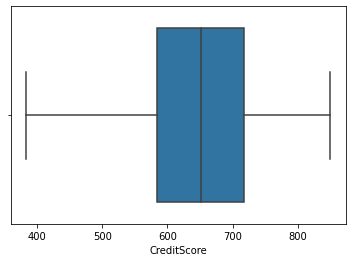

In [54]:
sns.boxplot(x =df_CreditScore)


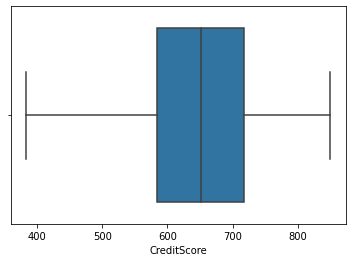

In [55]:
sns.boxplot(x =df["CreditScore"])


In [56]:
df_Age = df["Age"]
df_Age.head(3)

0    42
1    41
2    42
Name: Age, dtype: int64

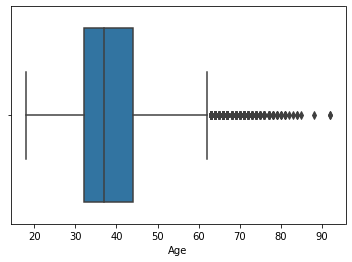

In [57]:
sns.boxplot( x =df_Age);

In [58]:
Q1 = df_Age.quantile(0.25)
Q3 = df_Age.quantile(0.75)
IQR = Q3-Q1

In [59]:
alt_sinir2 = Q1 - 1.5*IQR
ust_sinir2= Q3 + 1.5*IQR

In [60]:
aykrdf2 =(df_Age < alt_sinir2)|(df_Age > ust_sinir2)
aykrdf2

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Age, Length: 10000, dtype: bool

In [61]:
df_Age[aykrdf2]

58      66
85      75
104     65
158     73
181     65
        ..
9753    68
9765    64
9832    64
9894    77
9936    77
Name: Age, Length: 359, dtype: int64

In [62]:
df_Age.mean()

38.9218

In [63]:
ust_sinir2


62.0

In [64]:
df_Age[aykrdf2].mean()

69.27019498607243

In [65]:
df_Age = df["Age"]


In [66]:
df_Age[aykrdf2] = ust_sinir2

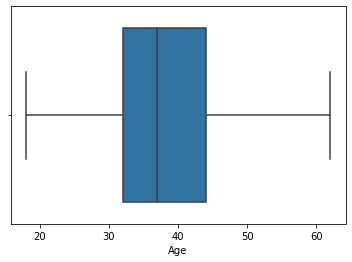

In [67]:
sns.boxplot(x = df_Age);


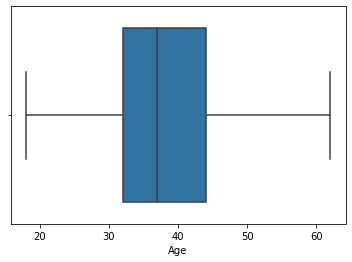

In [68]:
sns.boxplot(x = df["Age"]);


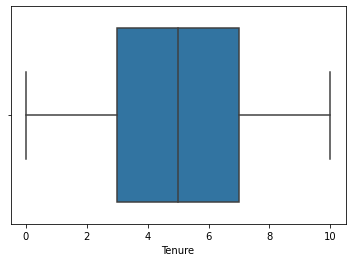

In [69]:
df_Tenure = df["Tenure"]
sns.boxplot( x=df_Tenure);

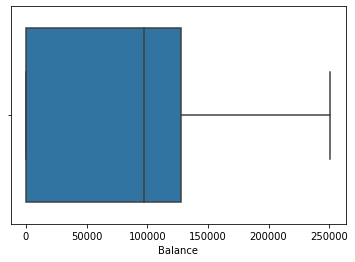

In [70]:
df_Balance = df["Balance"]
sns.boxplot(x = df_Balance);

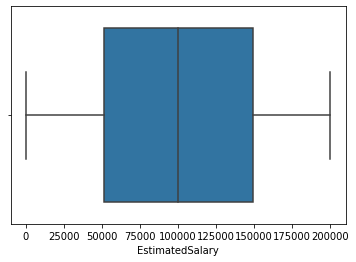

In [71]:
df_EstimatedSalary = df["EstimatedSalary"]
sns.boxplot(x =df_EstimatedSalary);

Yukarıda görüldüğü üzere detaylı bir aykırı gözlem analizi yapılmıştır.

"CreditScore" ve "Age" değişkenlerinde aykırı gözleme rastlanılmıştır.
Creditscore değişkeninde bulunan aykırı gözlemlerin ortalaması,alt sınır değerine daha yakın olduğu için aykırı değerlerin yerine ortalama atamak yerine alt sınıra baskılama işlemi yapılmıştır.

Aynı şekilde Age değişkeninde bulunan aykırı gözlemlerin ortalaması üst sınır değerine daha yakın olduğu için aykırı değerlerin yerine ortalama atamak yerine üst sınıra baskılama işlemi yapılmıştır. 

### Değişken Dönüşümleri

In [72]:
df.head(3)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [73]:
#yeni değişken isimleri incelendi
df.columns


Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [74]:
#değişken dönüşümü yapıldı
df = pd.get_dummies(df)

In [75]:
df.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0


# Model & Tahmin

In [76]:
#bağımlı-bağımsız değişken oluşturuldu
y = df["Exited"]
X = df.drop("Exited", axis =1)

In [77]:
#train-test veri setleri oluşturuldu
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)


In [78]:
#train-test veri setleri incelendi
print('DataFrame Shape:', df.shape)
print('*'*25)
print('X Train Shape:', X_train.shape)
print('*'*25)
print('X Test Shape:', X_test.shape)
print('*'*25)
print('Y Train Shape:', y_train.shape)
print('*'*25)
print('Y Test Shape:', y_test.shape)

DataFrame Shape: (10000, 14)
*************************
X Train Shape: (6700, 13)
*************************
X Test Shape: (3300, 13)
*************************
Y Train Shape: (6700,)
*************************
Y Test Shape: (3300,)


In [79]:
#uygun modeller kuruldu
models = []
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['BernoulliNB',BernoulliNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])

In [80]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train,y = y_train, cv=5)
# model doğrulama
# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

XGBClassifier :
[[2562   95]
 [ 336  307]]
Accuracy Score:  0.8693939393939394

K-Fold Validation Mean Accuracy: 85.94 %

Standard Deviation: 0.27 %

ROC AUC Score: 0.72 %

Precision: 0.76 %

Recall: 0.48 %

F1 Score: 0.59 %
----------------------------------------

Logistic Regression :
[[2588   69]
 [ 575   68]]
Accuracy Score:  0.8048484848484848

K-Fold Validation Mean Accuracy: 78.93 %

Standard Deviation: 0.30 %

ROC AUC Score: 0.54 %

Precision: 0.50 %

Recall: 0.11 %

F1 Score: 0.17 %
----------------------------------------

SVM :
[[2657    0]
 [ 643    0]]
Accuracy Score:  0.8051515151515152

K-Fold Validation Mean Accuracy: 79.19 %

Standard Deviation: 0.03 %

ROC AUC Score: 0.50 %

Precision: 0.00 %

Recall: 0.00 %

F1 Score: 0.00 %
----------------------------------------

KNeigbors :
[[2476  181]
 [ 581   62]]
Accuracy Score:  0.769090909090909

K-Fold Validation Mean Accuracy: 75.73 %

Standard Deviation: 1.04 %

ROC AUC Score: 0.51 %

Precision: 0.26 %

Recall: 0.10 %



XGBoost Model (FİNAL MODELİ)

In [81]:
#bağımlı-bağımsız değişken oluşturuldu
y = df["Exited"]
X = df.drop("Exited", axis =1)

In [82]:
#train-test veri setleri oluşturuldu
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=42)

In [83]:
from xgboost import  XGBClassifier

In [84]:
xgb_model = XGBClassifier().fit(X_train,y_train)

In [85]:
y_pred = xgb_model.predict(X_test)

In [86]:
accuracy_score(y_test,y_pred)

0.8693939393939394

Model Tuning

In [87]:
xgb = XGBClassifier()

In [88]:
xgb_params = {"n_estimators":[100,500,1000],
              "subsample":[0.6,0.8,1.0],
              "max_depth":[3,5,7],
              "learning_rate":[0.1,0.001,0.01]}

In [90]:
xgb_cv_model =GridSearchCV(xgb,xgb_params).fit(X_train,y_train)

In [92]:
xgb_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.6}

In [93]:
xgb_tuned = xgb = XGBClassifier(learning_rate= 0.01,
                                max_depth= 7,
                                n_estimators= 500, 
                                subsample= 0.6).fit(X_train,y_train)

In [94]:
y_pred = xgb_tuned.predict(X_test)

In [95]:
accuracy_score(y_test,y_pred)

0.8684848484848485